# 이벤트 로그 데이터 읽기 및 분석

In [1]:
# ===================================================================
# 1️⃣ 필수 라이브러리 Import
# ===================================================================

import os
import json
import pandas as pd
import numpy as np
from datetime import datetime
import warnings

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 설정
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Nanum Gothic'
plt.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ 라이브러리 로드 완료")

✅ 라이브러리 로드 완료


In [12]:
pd.set_option('display.max_columns', None)
# Windows 환경에서 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 사용 가능한 한글 폰트 찾기
font_list = [f.name for f in fm.fontManager.ttflist]
korean_fonts = ['Malgun Gothic', 'NanumGothic', 'AppleGothic', 'DejaVu Sans']

# 시스템에서 사용 가능한 첫 번째 폰트 선택
selected_font = 'DejaVu Sans'  # 기본값
for font in korean_fonts:
    if font in font_list:
        selected_font = font
        break

plt.rcParams['font.family'] = selected_font
plt.rcParams['axes.unicode_minus'] = False
print(f"선택된 폰트: {selected_font}")

선택된 폰트: Malgun Gothic


In [2]:
# ===================================================================
# 2️⃣ 이벤트 로그 데이터 읽기
# ===================================================================

# 파일 경로 설정
EVENT_LOG_PATH = 'event_logs/'
parquet_file = os.path.join(EVENT_LOG_PATH, 'correct_schema_event_logs.parquet')

# 파일 존재 확인
if os.path.exists(parquet_file):
    print(f"📁 파일 발견: {parquet_file}")
    
    # 파일 크기 확인
    file_size_mb = os.path.getsize(parquet_file) / (1024 * 1024)
    print(f"💽 파일 크기: {file_size_mb:.2f} MB")
    
    # 이벤트 로그 읽기
    print("\n📂 이벤트 로그 데이터 로딩 중...")
    df = pd.read_parquet(parquet_file)
    
    print(f"✅ 데이터 로딩 완료!")
    print(f"📊 총 이벤트 수: {len(df):,}개")
    print(f"📋 컬럼 수: {len(df.columns)}개")
    print(f"💾 메모리 사용량: {df.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")
    
else:
    print(f"❌ 파일을 찾을 수 없습니다: {parquet_file}")
    print("먼저 create_log_data.ipynb를 실행하여 이벤트 로그를 생성해주세요.")
    df = None

📁 파일 발견: event_logs/correct_schema_event_logs.parquet
💽 파일 크기: 965.22 MB

📂 이벤트 로그 데이터 로딩 중...
✅ 데이터 로딩 완료!
📊 총 이벤트 수: 9,970,258개
📋 컬럼 수: 8개
✅ 데이터 로딩 완료!
📊 총 이벤트 수: 9,970,258개
📋 컬럼 수: 8개
💾 메모리 사용량: 7605.54 MB
💾 메모리 사용량: 7605.54 MB


In [3]:
# ===================================================================
# 3️⃣ 데이터 구조 확인
# ===================================================================

if df is not None:
    print("🔍 데이터 구조 확인")
    print("=" * 50)
    
    # 기본 정보
    print(f"📊 데이터 형태: {df.shape}")
    print(f"\n📋 컬럼 정보:")
    for col in df.columns:
        dtype = df[col].dtype
        non_null_count = df[col].count()
        null_count = len(df) - non_null_count
        print(f"   - {col}: {dtype} (null: {null_count:,}개)")
    
    # 샘플 데이터 미리보기
    print(f"\n👀 첫 3행 미리보기:")
    display(df.head(3))
    
    # 고유값 개수
    print(f"\n🎯 고유값 개수:")
    print(f"   - 고유 사용자 수: {df['user_id'].nunique():,}명")
    print(f"   - 고유 세션 수: {df['session_id'].nunique():,}개")
    print(f"   - 이벤트 타입 수: {df['event_name'].nunique()}개")
    print(f"   - 날짜 범위: {df['timestamp'].min()} ~ {df['timestamp'].max()}")

🔍 데이터 구조 확인
📊 데이터 형태: (9970258, 8)

📋 컬럼 정보:
   - event_name: object (null: 0개)
   - event_name: object (null: 0개)
   - event_id: object (null: 0개)
   - user_id: object (null: 0개)
   - event_id: object (null: 0개)
   - user_id: object (null: 0개)
   - anonymous_id: object (null: 0개)
   - anonymous_id: object (null: 0개)
   - session_id: object (null: 0개)
   - session_id: object (null: 0개)
   - context: object (null: 0개)
   - context: object (null: 0개)
   - event_properties: object (null: 0개)
   - timestamp: object (null: 0개)

👀 첫 3행 미리보기:
   - event_properties: object (null: 0개)
   - timestamp: object (null: 0개)

👀 첫 3행 미리보기:


,event_name,event_id,user_id,anonymous_id,session_id,context,event_properties,timestamp
0,auth_success,694706cd-6fb9-4cf4-8e82-760abb6ea513,15107,b73a9a59-2514-465e-8107-783e3199da3e,015cab44-d906-4fee-af43-9b64d8874ff6,"{""page"": {""name"": ""main"", ""url"": ""https://reci...","{""method"": ""kakao"", ""type"": ""login""}",2025-05-01T21:22:24.000000Z
1,view_page,76494163-7a32-4fe5-a412-5477f47387fb,15107,8fe9db25-8510-45b2-b830-1760968f0a67,015cab44-d906-4fee-af43-9b64d8874ff6,"{""page"": {""name"": ""profile"", ""url"": ""https://r...","{""page_name"": ""profile"", ""referrer"": ""https://...",2025-05-01T21:22:53.000000Z
2,search_recipe,02248959-1fef-4b08-bcf3-05a3b14db3d2,15107,19ad976f-3104-446b-a60b-fc352ed2e32d,015cab44-d906-4fee-af43-9b64d8874ff6,"{""page"": {""name"": ""main"", ""url"": ""https://reci...","{""search_type"": ""ingredient"", ""search_keyword""...",2025-05-01T21:23:52.000000Z



🎯 고유값 개수:
   - 고유 사용자 수: 11,855명
   - 고유 사용자 수: 11,855명
   - 고유 세션 수: 632,101개
   - 고유 세션 수: 632,101개
   - 이벤트 타입 수: 11개
   - 이벤트 타입 수: 11개
   - 날짜 범위: 2024-08-01T06:01:01.000000Z ~ 2025-07-24T00:25:51.000000Z
   - 날짜 범위: 2024-08-01T06:01:01.000000Z ~ 2025-07-24T00:25:51.000000Z


In [4]:
# ===================================================================
# 4️⃣ JSON 컬럼 파싱 및 확장
# ===================================================================

if df is not None:
    print("🔄 JSON 컬럼 파싱 중...")
    
    # context 컬럼 파싱
    try:
        context_data = df['context'].apply(json.loads)
        
        # context.page 정보 추출
        df['page_name'] = context_data.apply(lambda x: x.get('page', {}).get('name', ''))
        df['page_url'] = context_data.apply(lambda x: x.get('page', {}).get('url', ''))
        df['page_path'] = context_data.apply(lambda x: x.get('page', {}).get('path', ''))
        df['user_segment'] = context_data.apply(lambda x: x.get('user_segment', ''))
        
        print("✅ context 컬럼 파싱 완료")
        
    except Exception as e:
        print(f"❌ context 파싱 오류: {e}")
    
    # event_properties 컬럼 파싱 (선택적으로 일부만)
    try:
        properties_data = df['event_properties'].apply(json.loads)
        
        # 자주 사용되는 속성들만 별도 컬럼으로 추출
        df['recipe_id'] = properties_data.apply(lambda x: x.get('recipe_id', ''))
        df['search_keyword'] = properties_data.apply(lambda x: x.get('search_keyword', ''))
        df['action'] = properties_data.apply(lambda x: x.get('action', ''))
        
        print("✅ event_properties 주요 필드 파싱 완료")
        
    except Exception as e:
        print(f"❌ event_properties 파싱 오류: {e}")
    
    # timestamp를 datetime으로 변환
    try:
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df['date'] = df['timestamp'].dt.date
        df['hour'] = df['timestamp'].dt.hour
        df['day_of_week'] = df['timestamp'].dt.day_name()
        
        print("✅ timestamp 변환 완료")
        
    except Exception as e:
        print(f"❌ timestamp 변환 오류: {e}")
    
    print(f"\n📊 확장된 데이터 형태: {df.shape}")
    print(f"📋 새로 추가된 컬럼들: page_name, page_url, page_path, user_segment, recipe_id, search_keyword, action, date, hour, day_of_week")

🔄 JSON 컬럼 파싱 중...
✅ context 컬럼 파싱 완료
✅ context 컬럼 파싱 완료
✅ event_properties 주요 필드 파싱 완료
✅ event_properties 주요 필드 파싱 완료
✅ timestamp 변환 완료

📊 확장된 데이터 형태: (9970258, 18)
📋 새로 추가된 컬럼들: page_name, page_url, page_path, user_segment, recipe_id, search_keyword, action, date, hour, day_of_week
✅ timestamp 변환 완료

📊 확장된 데이터 형태: (9970258, 18)
📋 새로 추가된 컬럼들: page_name, page_url, page_path, user_segment, recipe_id, search_keyword, action, date, hour, day_of_week


In [5]:
# ===================================================================
# 5️⃣ 기본 통계 및 분석
# ===================================================================

if df is not None:
    print("📈 기본 통계 분석")
    print("=" * 50)
    
    # 이벤트 타입별 분포
    print("\n🎯 이벤트 타입별 분포:")
    event_counts = df['event_name'].value_counts()
    for event_name, count in event_counts.items():
        percentage = (count / len(df)) * 100
        print(f"   {event_name}: {count:,}개 ({percentage:.1f}%)")
    
    # 페이지별 분포
    print("\n📱 페이지별 분포:")
    page_counts = df['page_name'].value_counts().head(10)
    for page_name, count in page_counts.items():
        percentage = (count / len(df)) * 100
        print(f"   {page_name}: {count:,}개 ({percentage:.1f}%)")
    
    # 사용자 세그먼트별 분포
    print("\n👥 사용자 세그먼트별 분포:")
    segment_counts = df['user_segment'].value_counts()
    for segment, count in segment_counts.items():
        percentage = (count / len(df)) * 100
        print(f"   {segment}: {count:,}개 ({percentage:.1f}%)")
    
    # 일별 이벤트 수
    print("\n📅 일별 이벤트 수 (최근 10일):")
    daily_events = df.groupby('date').size().sort_index().tail(10)
    for date, count in daily_events.items():
        print(f"   {date}: {count:,}개")
    
    # 시간대별 이벤트 수
    print("\n🕐 시간대별 이벤트 수:")
    hourly_events = df['hour'].value_counts().sort_index()
    for hour, count in hourly_events.head(10).items():
        print(f"   {hour:02d}시: {count:,}개")

📈 기본 통계 분석

🎯 이벤트 타입별 분포:
   view_page: 1,869,818개 (18.8%)
   search_recipe: 1,821,496개 (18.3%)
   click_recipe_from_list: 1,773,937개 (17.8%)
   view_recipe_list: 1,660,209개 (16.7%)
   auth_success: 583,238개 (5.8%)
   create_comment: 546,312개 (5.5%)
   click_bookmark: 439,077개 (4.4%)
   click_like: 437,941개 (4.4%)
   click_auth_button: 353,639개 (3.5%)
   view_ads: 352,025개 (3.5%)
   click_ads: 132,566개 (1.3%)

📱 페이지별 분포:
   view_page: 1,869,818개 (18.8%)
   search_recipe: 1,821,496개 (18.3%)
   click_recipe_from_list: 1,773,937개 (17.8%)
   view_recipe_list: 1,660,209개 (16.7%)
   auth_success: 583,238개 (5.8%)
   create_comment: 546,312개 (5.5%)
   click_bookmark: 439,077개 (4.4%)
   click_like: 437,941개 (4.4%)
   click_auth_button: 353,639개 (3.5%)
   view_ads: 352,025개 (3.5%)
   click_ads: 132,566개 (1.3%)

📱 페이지별 분포:
   main: 8,475,163개 (85.0%)
   profile: 374,250개 (3.8%)
   search_result: 374,122개 (3.8%)
   start: 373,581개 (3.7%)
   recipe_detail: 373,142개 (3.7%)

👥 사용자 세그먼트별 분포:
   FEMALE

In [6]:
# ===================================================================
# 6️⃣ 특정 조건으로 데이터 필터링 예시
# ===================================================================

if df is not None:
    print("🔍 데이터 필터링 예시")
    print("=" * 50)
    
    # 예시 1: 특정 이벤트만 필터링
    search_events = df[df['event_name'] == 'search_recipe']
    print(f"\n🔎 검색 이벤트만: {len(search_events):,}개")
    
    # 예시 2: 특정 날짜 범위
    recent_events = df[df['timestamp'] >= '2024-12-01']
    print(f"📅 2024-12-01 이후 이벤트: {len(recent_events):,}개")
    
    # 예시 3: 특정 사용자 세그먼트
    female_20s_events = df[df['user_segment'] == 'FEMALE_20S']
    print(f"👩 20대 여성 이벤트: {len(female_20s_events):,}개")
    
    # 예시 4: 특정 페이지의 이벤트
    main_page_events = df[df['page_name'] == 'main']
    print(f"🏠 메인 페이지 이벤트: {len(main_page_events):,}개")
    
    # 예시 5: 복합 조건 (메인 페이지 + 20대 여성)
    complex_filter = df[
        (df['page_name'] == 'main') & 
        (df['user_segment'] == 'FEMALE_20S')
    ]
    print(f"🎯 메인 페이지 + 20대 여성: {len(complex_filter):,}개")

🔍 데이터 필터링 예시

🔎 검색 이벤트만: 1,821,496개

🔎 검색 이벤트만: 1,821,496개
📅 2024-12-01 이후 이벤트: 9,340,330개
📅 2024-12-01 이후 이벤트: 9,340,330개
👩 20대 여성 이벤트: 1,386,299개
👩 20대 여성 이벤트: 1,386,299개
🏠 메인 페이지 이벤트: 8,475,163개
🏠 메인 페이지 이벤트: 8,475,163개
🎯 메인 페이지 + 20대 여성: 1,178,720개
🎯 메인 페이지 + 20대 여성: 1,178,720개


In [7]:
# ===================================================================
# 7️⃣ 사용자별/세션별 분석 예시
# ===================================================================

if df is not None:
    print("👤 사용자별/세션별 분석")
    print("=" * 50)
    
    # 사용자별 이벤트 수
    user_event_counts = df.groupby('user_id').size()
    print(f"\n📊 사용자별 이벤트 수 통계:")
    print(f"   평균: {user_event_counts.mean():.1f}개")
    print(f"   중앙값: {user_event_counts.median():.1f}개")
    print(f"   최대: {user_event_counts.max():,}개")
    print(f"   최소: {user_event_counts.min():,}개")
    
    # 세션별 이벤트 수
    session_event_counts = df.groupby('session_id').size()
    print(f"\n🔄 세션별 이벤트 수 통계:")
    print(f"   평균: {session_event_counts.mean():.1f}개")
    print(f"   중앙값: {session_event_counts.median():.1f}개")
    print(f"   최대: {session_event_counts.max():,}개")
    print(f"   최소: {session_event_counts.min():,}개")
    
    # 가장 활발한 사용자 TOP 5
    print(f"\n🔥 가장 활발한 사용자 TOP 5:")
    top_users = user_event_counts.nlargest(5)
    for user_id, count in top_users.items():
        print(f"   {user_id}: {count:,}개 이벤트")
    
    # 가장 긴 세션 TOP 5
    print(f"\n⏱️ 가장 긴 세션 TOP 5:")
    top_sessions = session_event_counts.nlargest(5)
    for session_id, count in top_sessions.items():
        print(f"   {session_id}: {count:,}개 이벤트")

👤 사용자별/세션별 분석

📊 사용자별 이벤트 수 통계:
   평균: 841.0개
   중앙값: 585.0개
   최대: 10,052개
   최소: 6개

📊 사용자별 이벤트 수 통계:
   평균: 841.0개
   중앙값: 585.0개
   최대: 10,052개
   최소: 6개

🔄 세션별 이벤트 수 통계:
   평균: 15.8개
   중앙값: 14.0개
   최대: 34개
   최소: 4개

🔥 가장 활발한 사용자 TOP 5:
   25112: 10,052개 이벤트
   21257: 9,346개 이벤트
   2263: 8,653개 이벤트
   29260: 7,900개 이벤트
   10303: 7,472개 이벤트

⏱️ 가장 긴 세션 TOP 5:
   0001b74b-fb96-4222-a09a-1109e19aeb1d: 34개 이벤트
   0002c05b-3b6a-4412-a6f2-3d3b8eec13a5: 34개 이벤트
   00245795-c625-4e88-a117-70f6e612fdbf: 34개 이벤트
   002643d4-6af1-47d6-ade0-771d9c03bf2c: 34개 이벤트
   003c4069-6069-499f-8fc0-3be400ddb5c4: 34개 이벤트

🔄 세션별 이벤트 수 통계:
   평균: 15.8개
   중앙값: 14.0개
   최대: 34개
   최소: 4개

🔥 가장 활발한 사용자 TOP 5:
   25112: 10,052개 이벤트
   21257: 9,346개 이벤트
   2263: 8,653개 이벤트
   29260: 7,900개 이벤트
   10303: 7,472개 이벤트

⏱️ 가장 긴 세션 TOP 5:
   0001b74b-fb96-4222-a09a-1109e19aeb1d: 34개 이벤트
   0002c05b-3b6a-4412-a6f2-3d3b8eec13a5: 34개 이벤트
   00245795-c625-4e88-a117-70f6e612fdbf: 34개 이벤트
   002643d4-6af1-47d6-ade0-771

📊 시각화 예시


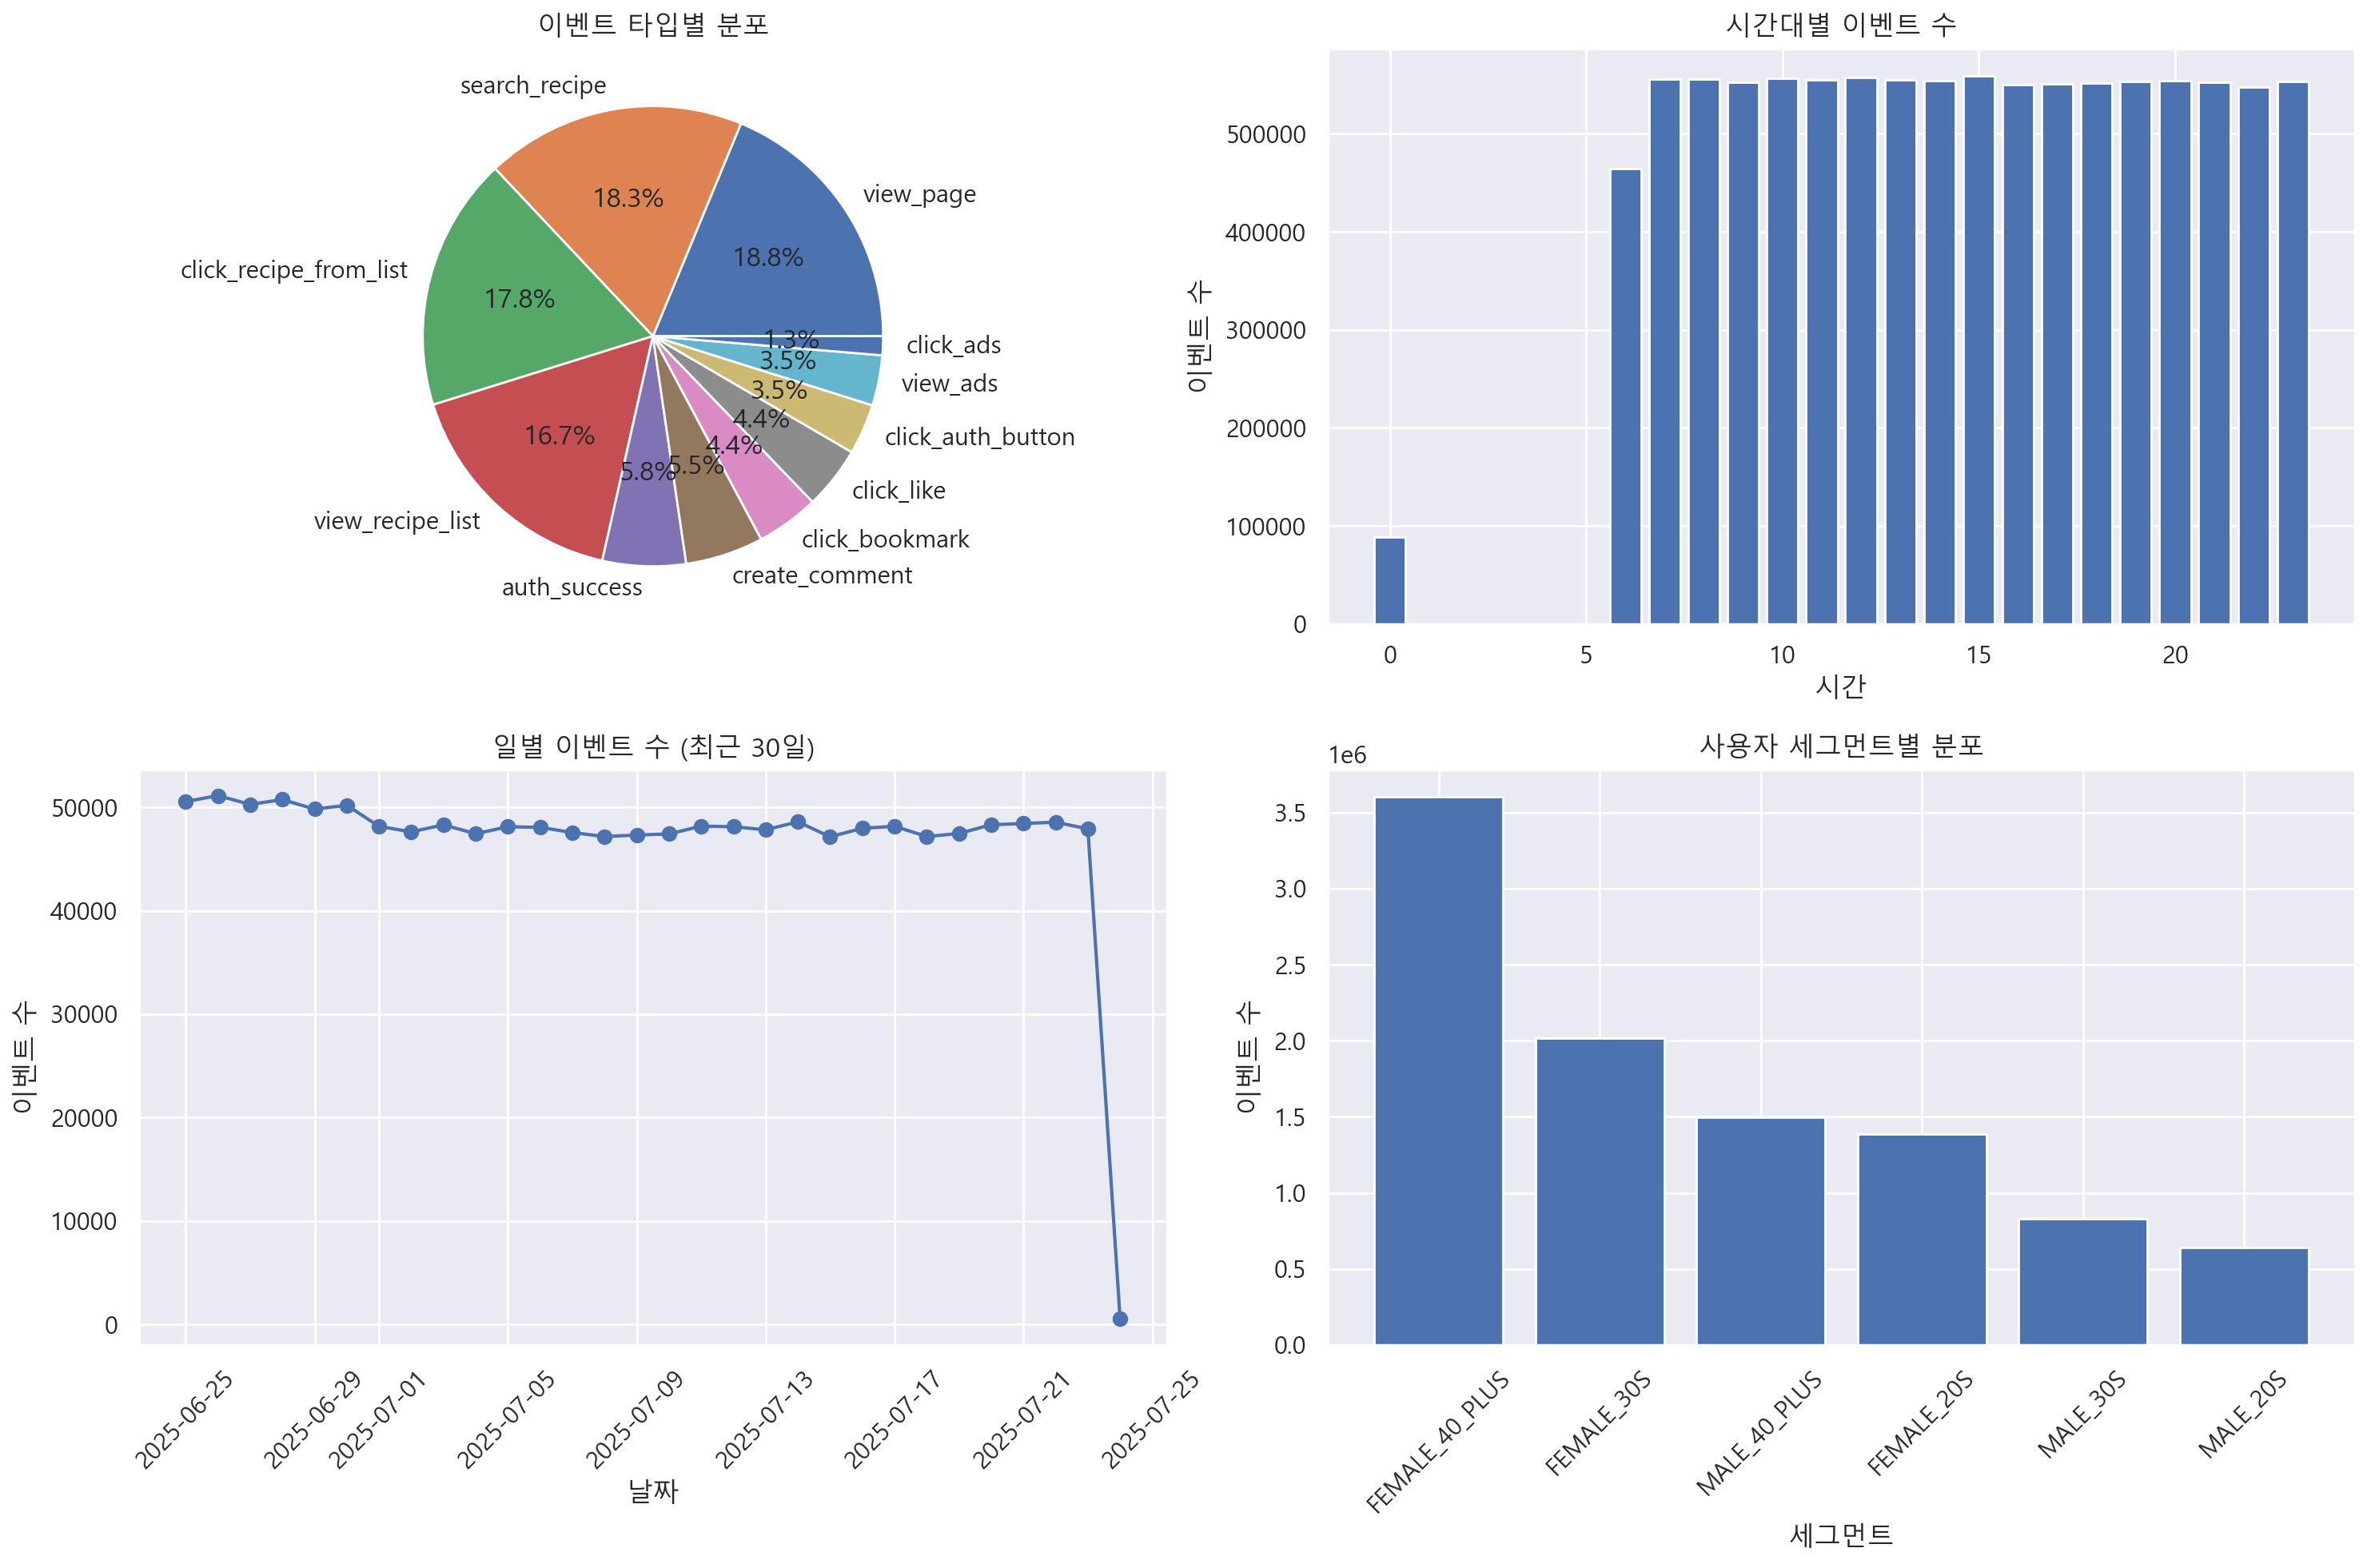

✅ 시각화 완료


In [13]:
# ===================================================================
# 8️⃣ 시각화 예시
# ===================================================================

if df is not None:
    print("📊 시각화 예시")
    print("=" * 30)
    
    # 그래프 설정
    plt.figure(figsize=(15, 10))
    
    # 1. 이벤트 타입별 분포
    plt.subplot(2, 2, 1)
    event_counts = df['event_name'].value_counts()
    plt.pie(event_counts.values, labels=event_counts.index, autopct='%1.1f%%')
    plt.title('이벤트 타입별 분포')
    
    # 2. 시간대별 이벤트 수
    plt.subplot(2, 2, 2)
    hourly_events = df['hour'].value_counts().sort_index()
    plt.bar(hourly_events.index, hourly_events.values)
    plt.title('시간대별 이벤트 수')
    plt.xlabel('시간')
    plt.ylabel('이벤트 수')
    
    # 3. 일별 이벤트 수 (최근 30일)
    plt.subplot(2, 2, 3)
    daily_events = df.groupby('date').size().sort_index().tail(30)
    plt.plot(daily_events.index, daily_events.values, marker='o')
    plt.title('일별 이벤트 수 (최근 30일)')
    plt.xlabel('날짜')
    plt.ylabel('이벤트 수')
    plt.xticks(rotation=45)
    
    # 4. 사용자 세그먼트별 분포
    plt.subplot(2, 2, 4)
    segment_counts = df['user_segment'].value_counts()
    plt.bar(range(len(segment_counts)), segment_counts.values)
    plt.title('사용자 세그먼트별 분포')
    plt.xlabel('세그먼트')
    plt.ylabel('이벤트 수')
    plt.xticks(range(len(segment_counts)), segment_counts.index, rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print("✅ 시각화 완료")

In [11]:
# ===================================================================
# 🔟 메모리 최적화 팁
# ===================================================================

if df is not None:
    print("🚀 메모리 최적화 팁")
    print("=" * 40)
    
    print("\n💡 대용량 데이터를 다룰 때의 팁:")
    print("\n1. 청크 단위로 읽기:")
    print("   chunk_size = 50000")
    print("   for chunk in pd.read_parquet(file, chunksize=chunk_size):")
    print("       # chunk 단위로 처리")
    
    print("\n2. 특정 컬럼만 읽기:")
    print("   df = pd.read_parquet(file, columns=['event_name', 'user_id', 'timestamp'])")
    
    print("\n3. 날짜 범위로 필터링:")
    print("   df_recent = df[df['timestamp'] >= '2024-12-01']")
    
    print("\n4. 데이터 타입 최적화:")
    print("   df['user_id'] = df['user_id'].astype('category')")
    print("   df['event_name'] = df['event_name'].astype('category')")
    
    print("\n5. 불필요한 객체 삭제:")
    print("   del large_df")
    print("   import gc; gc.collect()")
    
    print(f"\n📊 현재 메모리 사용량: {df.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")
    
    print("\n✅ 이벤트 로그 읽기 및 분석 완료!")
    print("🎯 이제 이 데이터를 활용하여 다양한 분석을 수행할 수 있습니다.")

🚀 메모리 최적화 팁

💡 대용량 데이터를 다룰 때의 팁:

1. 청크 단위로 읽기:
   chunk_size = 50000
   for chunk in pd.read_parquet(file, chunksize=chunk_size):
       # chunk 단위로 처리

2. 특정 컬럼만 읽기:
   df = pd.read_parquet(file, columns=['event_name', 'user_id', 'timestamp'])

3. 날짜 범위로 필터링:
   df_recent = df[df['timestamp'] >= '2024-12-01']

4. 데이터 타입 최적화:
   df['user_id'] = df['user_id'].astype('category')
   df['event_name'] = df['event_name'].astype('category')

5. 불필요한 객체 삭제:
   del large_df
   import gc; gc.collect()

📊 현재 메모리 사용량: 12289.89 MB

✅ 이벤트 로그 읽기 및 분석 완료!
🎯 이제 이 데이터를 활용하여 다양한 분석을 수행할 수 있습니다.

📊 현재 메모리 사용량: 12289.89 MB

✅ 이벤트 로그 읽기 및 분석 완료!
🎯 이제 이 데이터를 활용하여 다양한 분석을 수행할 수 있습니다.
